# Import libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import timeit
from scipy.sparse.csgraph import dijkstra
from scipy.sparse.csgraph import bellman_ford

# Formulation of the problem and methods
### I.	Generate a random adjacency matrix for a simple undirected weighted graph of 100 vertices and 500 edges with assigned random positive integer weights (note that the matrix should be symmetric and contain only 0s and weights as elements). Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices. Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm. Analyse the results obtained.
### II.	Generate a 10x20 cell grid with 40 obstacle cells. Choose two random non-obstacle cells and find a shortest path between them using A* algorithm. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained.
### III.	Describe the data structures and design techniques used within the algorithms.

# Part 1

In [62]:
# Generate a random symmetric adjacency matrix
# squared matrix is symmetric if a(i, j) == a(j, i) or M = M^T

n_vertices = 100
n_edges = 500

def make_symmetric_adjency_matrix(n_vertices, n_edges):
    matrix = np.zeros(shape=(n_vertices, n_vertices))

    while n_edges != 0:
        i, j = np.random.randint(0, n_vertices), np.random.randint(0, n_vertices)
        if i != j and matrix[i, j] == 0:
            matrix[i, j] = np.random.randint(100)
            matrix[j, i] = matrix[i, j]
            n_edges -= 1
    return matrix

adj_matrix = make_symmetric_adjency_matrix(n_vertices, n_edges)
print('Is matrix symmetric:', np.array_equal(adj_matrix, adj_matrix.transpose()), '\n'
      'Is matrix squared: ', adj_matrix.shape, '\n', 'Matrix:', adj_matrix)

Is matrix symmetric: True 
Is matrix squared:  (100, 100) 
 Matrix: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  4.  0. ...  0.  0. 36.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 36.  0.  0.]]


In [64]:
# Adjacency list
adj_list = {v:[] for v in range(n_vertices)}
for v in adj_list.keys():
    for i in range(n_vertices):
        if adj_matrix[v, i] != 0:
            adj_list[v].append(i)
adj_list

{0: [6, 15, 29, 35, 36, 54, 58, 89, 90, 95],
 1: [3, 15, 24, 26, 29, 41, 86, 90, 97],
 2: [43, 46, 47, 71, 75, 77],
 3: [1, 6, 8, 9, 14, 30, 39, 48, 57, 60, 83, 86],
 4: [25, 45, 58, 68, 88, 89, 94, 96, 99],
 5: [14, 20, 22, 44, 45, 55, 58, 80, 94],
 6: [0, 3, 21, 22, 26, 34, 40, 48, 76, 80, 90],
 7: [28, 31, 36, 47, 62, 63, 74, 77, 90],
 8: [3, 27, 36, 47, 72, 76, 83],
 9: [3, 57, 58, 64, 67, 72, 87, 91, 92, 97],
 10: [11, 30, 59, 66, 86, 98],
 11: [10, 12, 23, 37, 58, 60, 72, 73, 77, 86],
 12: [11, 15, 29, 33, 43, 53, 60, 71, 74, 76, 87, 88, 93],
 13: [29, 35, 38, 49, 51, 57, 65, 67, 86, 91, 96],
 14: [3, 5, 29, 38, 39, 53, 64, 66, 69, 71, 84, 97],
 15: [0, 1, 12, 17, 24, 43, 44, 49, 57, 61, 74, 79, 84, 85],
 16: [19, 29, 46, 49, 58, 67, 86],
 17: [15, 28, 41, 44, 67, 70, 83, 92, 98],
 18: [27, 33, 38, 78, 86, 90, 98],
 19: [16, 26, 37, 51, 60, 70, 72, 73, 97],
 20: [5, 40, 42, 43, 51, 53, 54, 73, 76, 79, 84, 89, 91],
 21: [6, 28, 52, 55, 56, 89, 90, 94],
 22: [5, 6, 39, 42, 49, 62, 

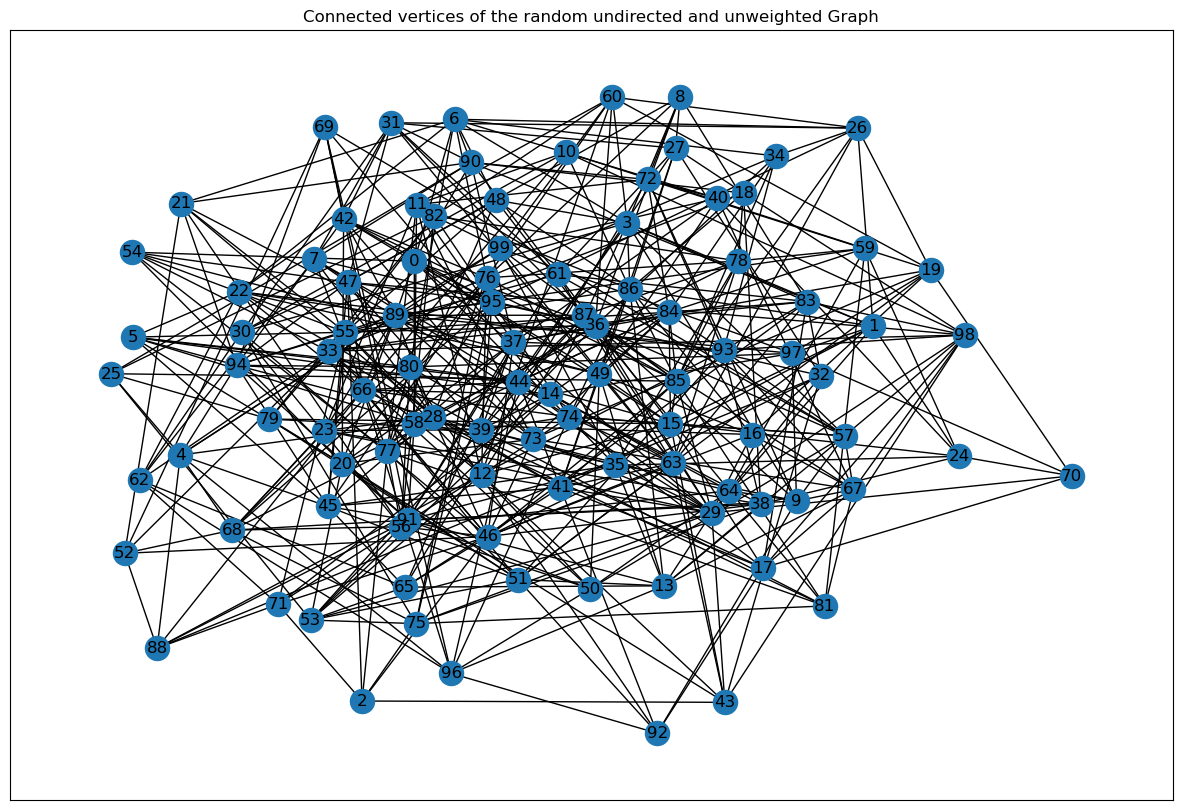

In [65]:
# Graph visualisation vertices with the edges
G = nx.from_numpy_array(adj_matrix)
nx.Graph.remove_nodes_from()

not_null_verticles = {}
for k in adj_list.keys():
    if len(adj_list[k]) !=0:
        not_null_verticles[k] = adj_list[k]

plt.figure(figsize=(15, 10))
plt.title('Connected vertices of the random undirected and unweighted Graph')
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True, nodelist = not_null_verticles)

In [66]:
def get_execution_time(algorithm, G, random_start):
    start_time = timeit.default_timer()

    algorithm(G, random_start)

    return timeit.default_timer() - start_time

In [67]:
def get_execution_time_array(algorithm, G, n_vertices, mean_count=10):
    execution_time_summ = 0
    for m in range(mean_count):
        random_start = np.random.randint(n_vertices)
        execution_time_summ += get_execution_time(algorithm, G, random_start)

    execution_time_mean = execution_time_summ / mean_count

    return execution_time_mean

In [68]:
# random_start = np.random.randint(n_vertices)
dijkstra_mean_time = get_execution_time_array(nx.single_source_dijkstra, G, n_vertices)
bellman_ford_mean_time = get_execution_time_array(nx.single_source_bellman_ford, G, n_vertices)
print("Dijkstra algorithm execution mean time - {:.5f}".format(dijkstra_mean_time), '\n'
      "Bellman-Ford algorithm execution mean time - {:.5f}".format(bellman_ford_mean_time))

Dijkstra algorithm execution mean time - 0.00035 
Bellman-Ford algorithm execution mean time - 0.00075


# Part 2
### Generate a 10x20 cell grid with 40 obstacle cells. Choose two random non-obstacle cells and find a shortest path between them using A* algorithm. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained.

In [101]:
# make Grid
Grid = nx.grid_2d_graph(10, 20)
obstacles = []

# remove from Grid some cells, make obstacles
for i in range(40):
    idx1, idx2 = np.random.randint(0, 10), np.random.randint(0, 20)
    obstacles.append((idx1, idx2))

Grid.remove_nodes_from(obstacles)

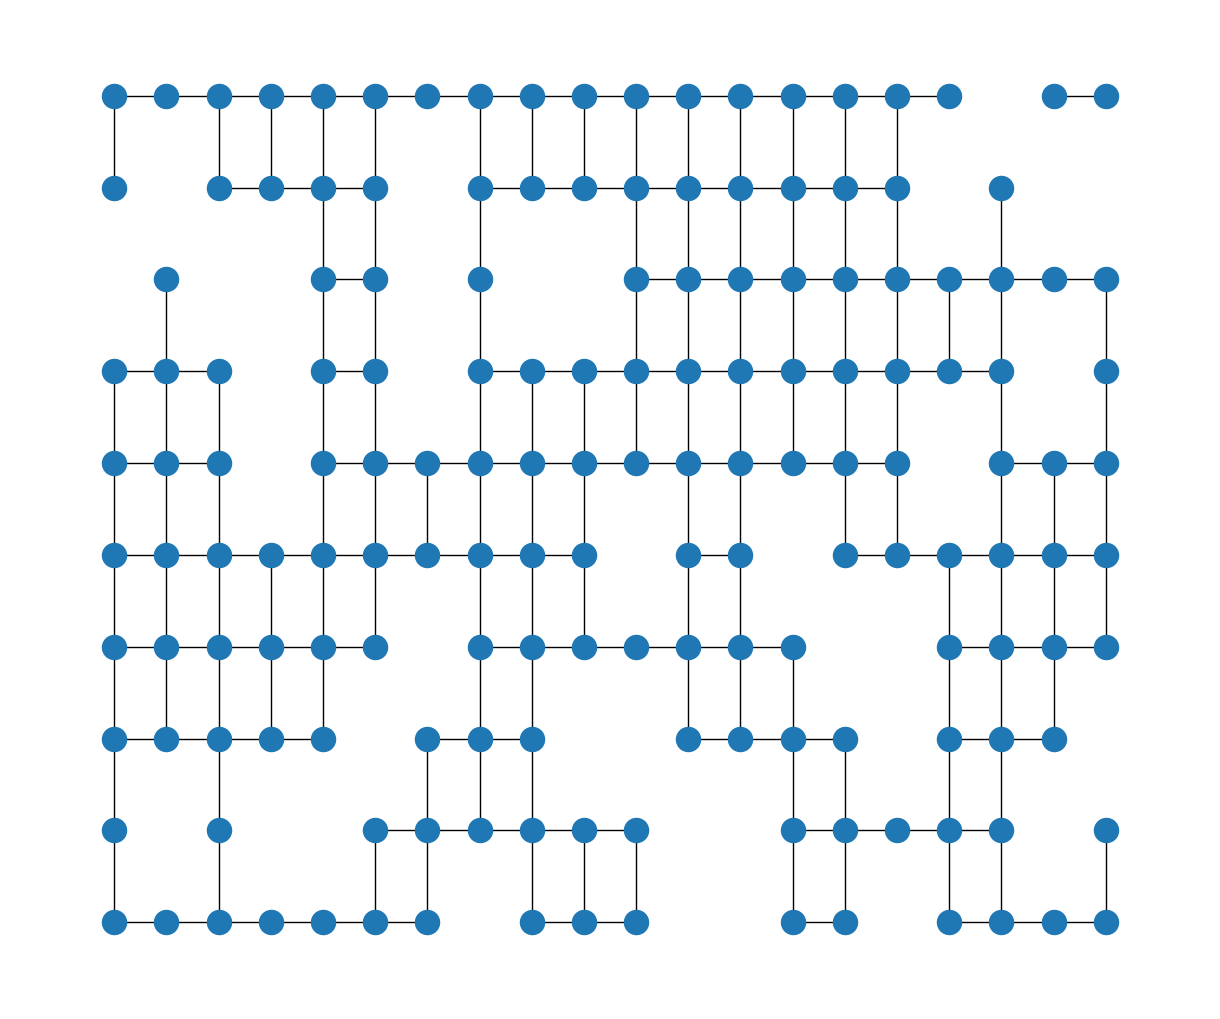

In [106]:
plt.figure(figsize=(12, 10))
pos = {(x, y): (y, -x) for x, y in Grid.nodes()}
nx.draw(Grid, pos=pos, with_labels=False)

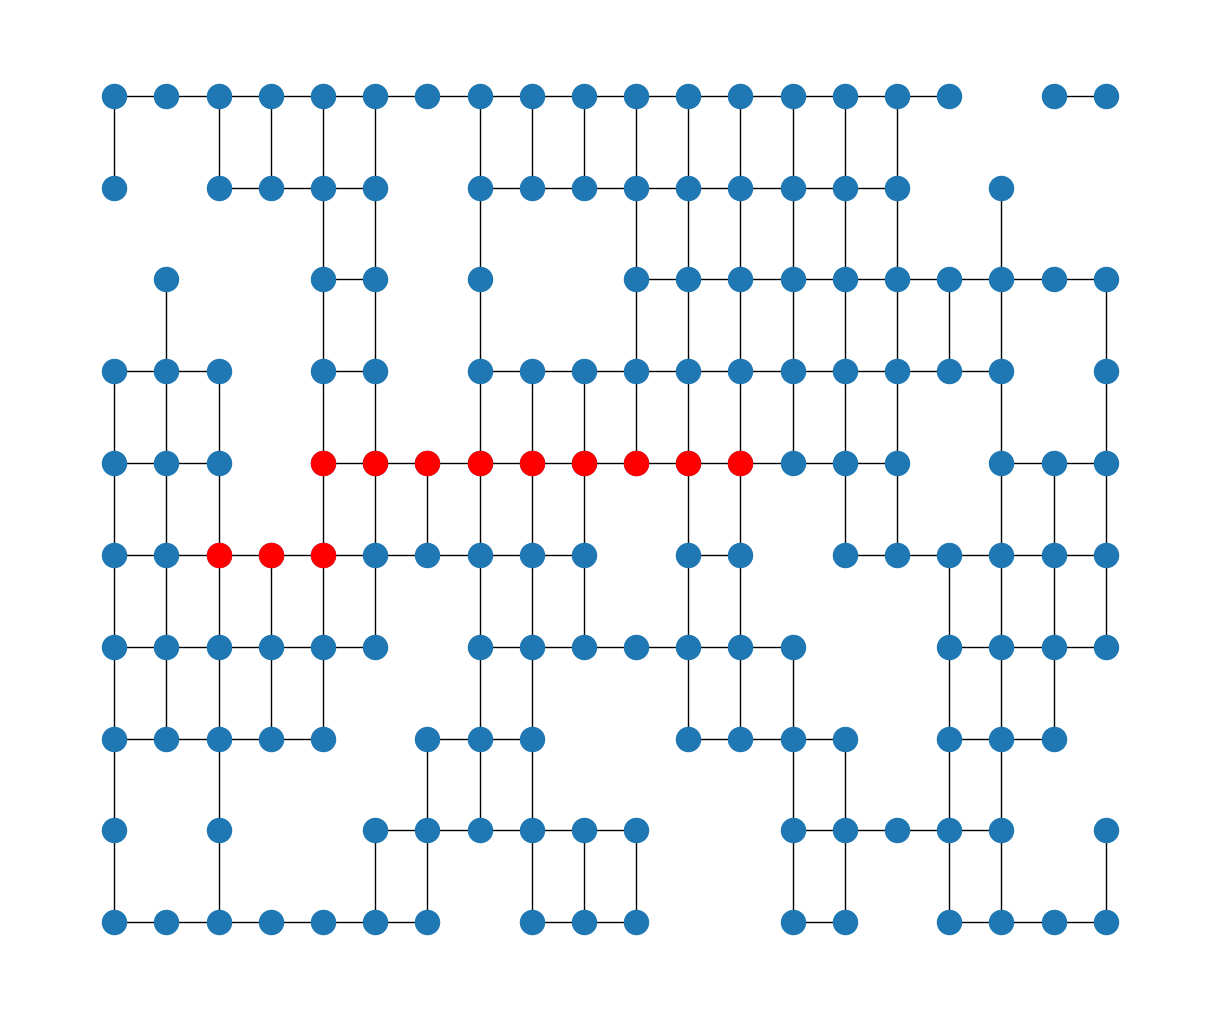

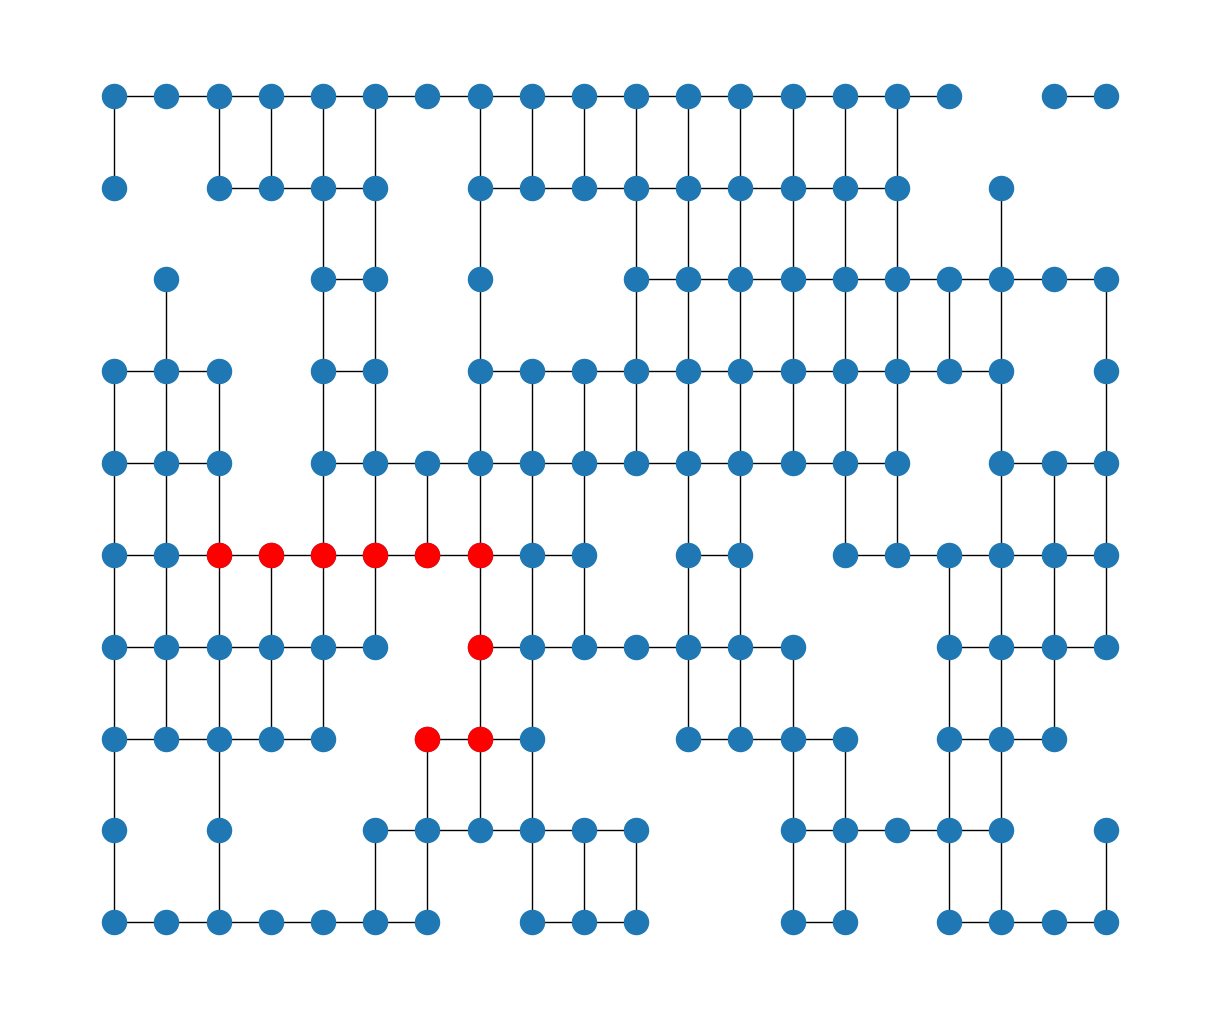

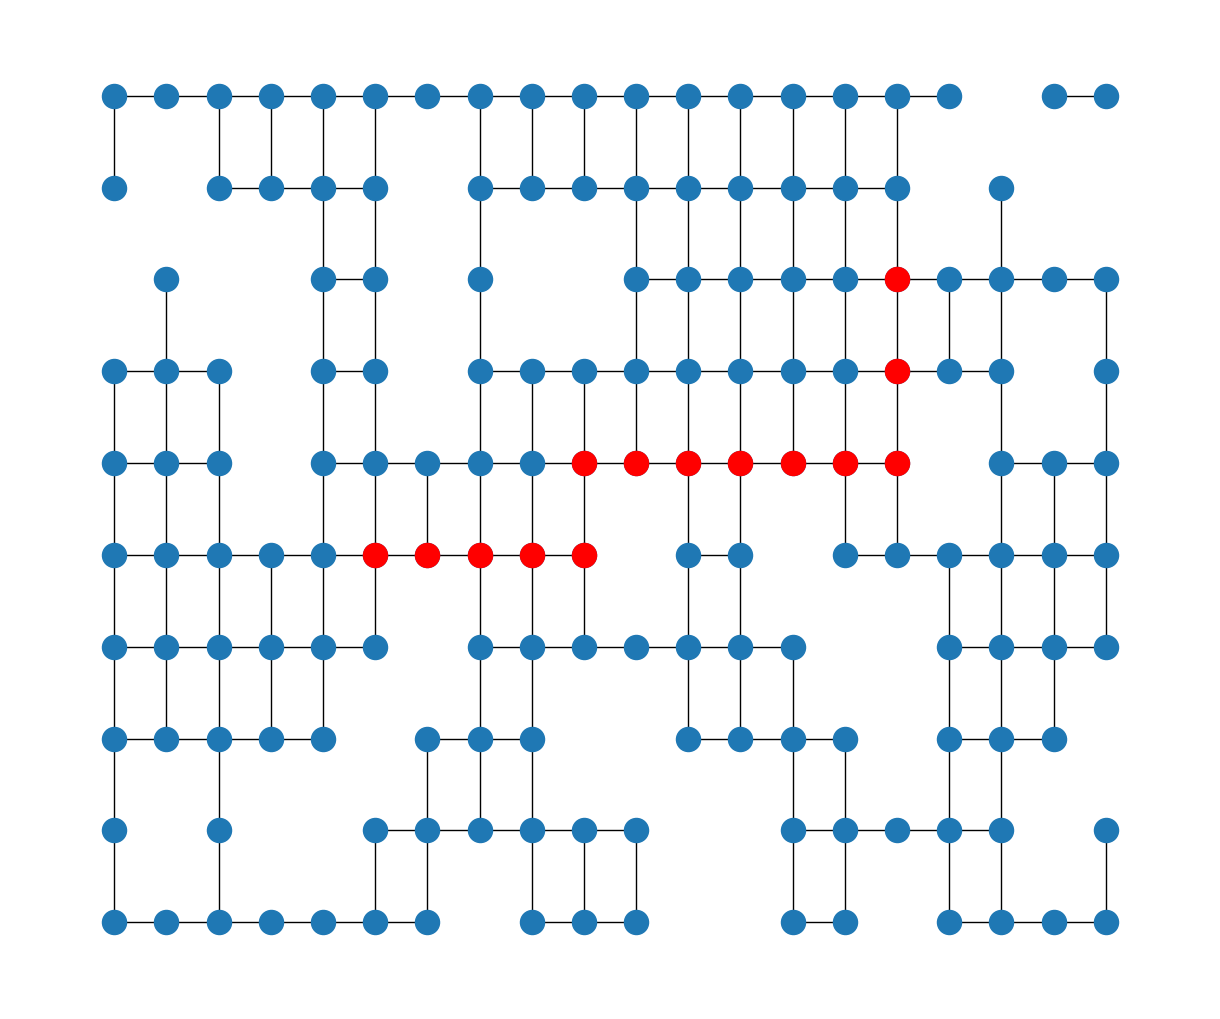

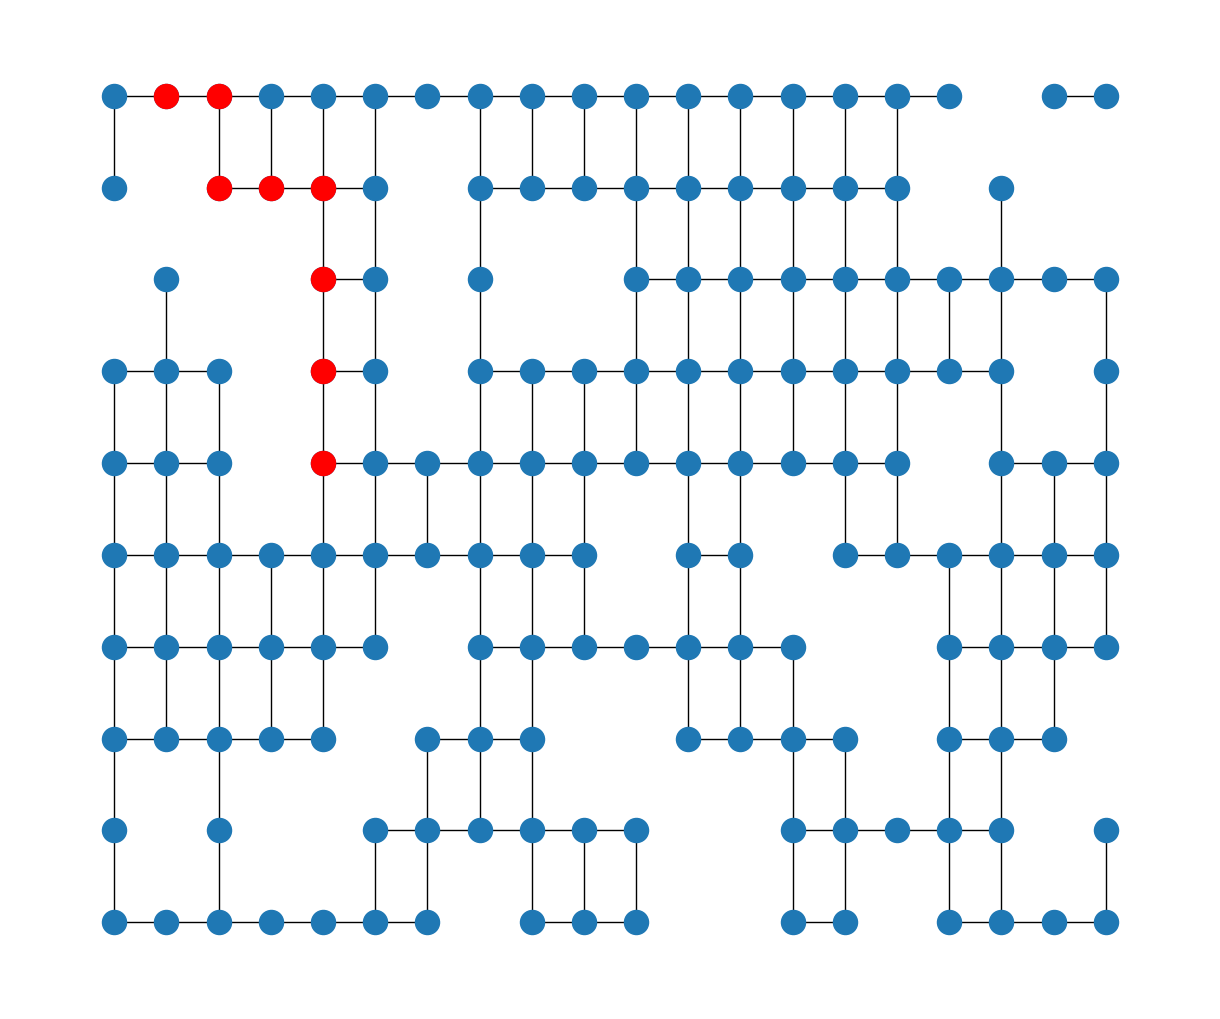

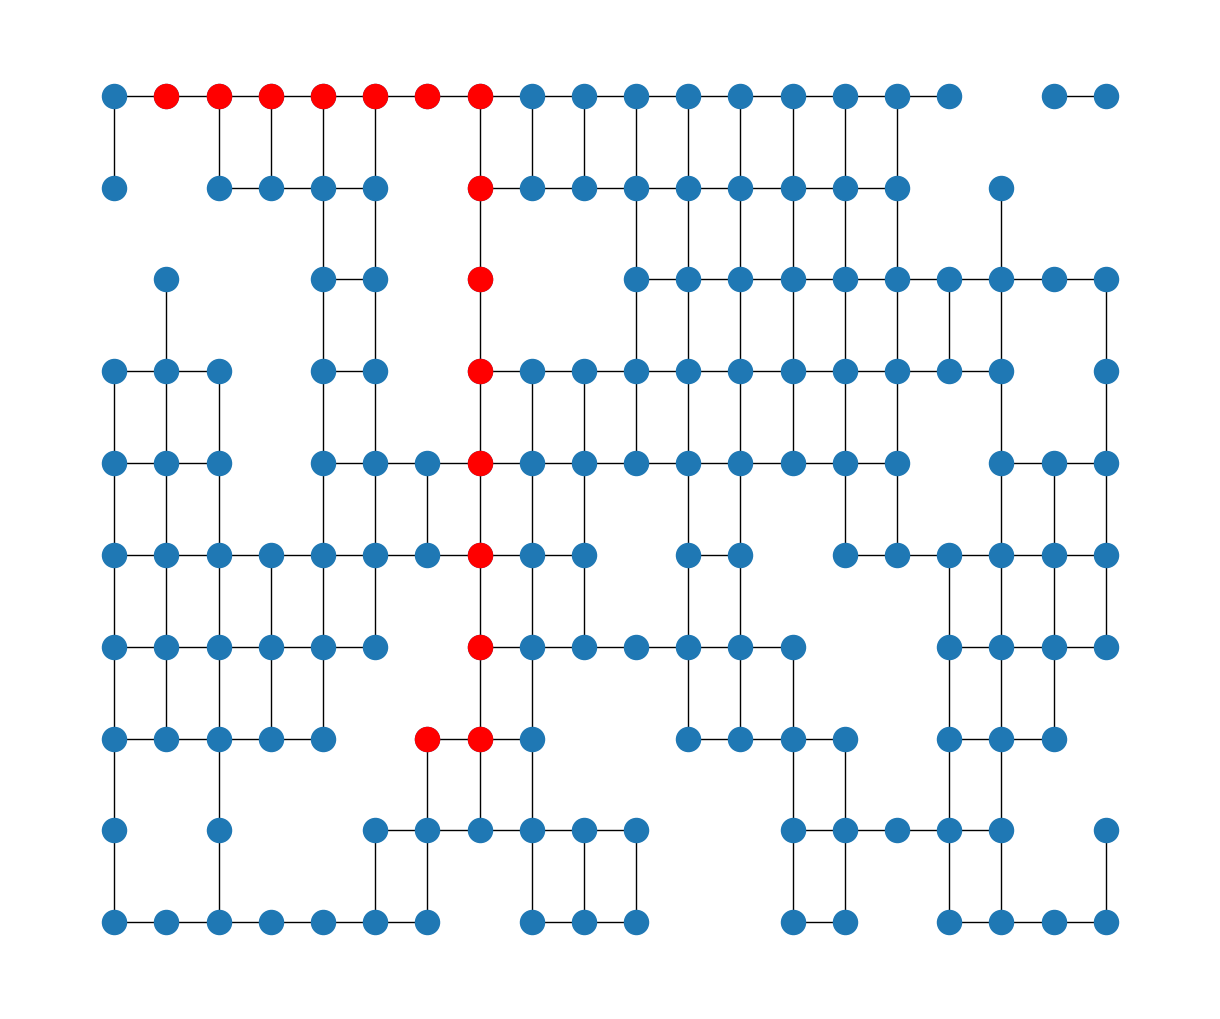

In [123]:
# A-star algorithm
nodes_list = list(Grid.nodes)
for i in range(5):
    s, t = np.random.randint(len(nodes_list)), np.random.randint(len(nodes_list))
    plt.figure(figsize=(12, 10))
    nx.draw(Grid, pos=pos, with_labels=False)
    try:
        path = nx.astar_path(Grid, nodes_list[s], nodes_list[t])
        nx.draw_networkx_nodes(Grid, pos=pos, nodelist=path, node_color='r')
    except:
        print(f'There is no existing path between {s} and {t}')

# Conclusion

### In this practical work was considered the use of path search algorithms on weighted graphs (Dijkstra's, A* and Bellman- Ford algorithms). The work shows us effectiveness and time complexity of each path search algorithm.